# Lab | Customer Analysis Final Round


For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

## 01 - Problem (case study)

- Data Description.

- Goal.

In [304]:
# I set the goal as 'Total Claim Amount	'.
# I am not exactly sure about the what the data represents, but it is about the satisfactions/dissatisfactions
# of customers of the car insurance.

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import math
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

## 02 - Getting Data

Read the .csv file.

In [306]:
# importing the file

df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
df = df.drop_duplicates()
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

In [307]:
# Change headers names
# There is no NaN values in the data set

df.columns = [column.lower().replace(' ', '_') for column in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [308]:
# set index as 'customer'

df = df.set_index('customer')

In [309]:
# Categorical Features

df.select_dtypes(include=object).columns

Index(['state', 'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [310]:
# Nominal and binary data are as followeing 
nominal = ['state']
binary = ['response', 'education','employmentstatus','gender', 'location_code', 'marital_status',
         'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class'] 

# following variables could be changed into numerical data type
ordinal = ['coverage', 'vehicle_size']
date = ['effective_to_date']

In [311]:
# transform 'effective_to_data' into date variables

df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
df['effective_to_date']

customer
BU79786   2011-02-24
QZ44356   2011-01-31
AI49188   2011-02-19
WW63253   2011-01-20
HB64268   2011-02-03
             ...    
LA72316   2011-02-10
PK87824   2011-02-12
TD14365   2011-02-06
UP19263   2011-02-03
Y167826   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [312]:
# transform the ordinal varialbes into numeric
# first with 'coverage'

df["coverage"].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [313]:
# not sure which is considered as privilaged 'Extended', so i will put 'coverage' into binary

binary = ['response', 'coverage','education','employmentstatus','gender', 'location_code', 'marital_status',
         'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class'] 
ordinal = [ 'vehicle_size']

In [314]:
# transform 'vehicle_size' into numeric
df["vehicle_size"].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [315]:
# Small=1, Medsize=2, Large=3
df["vehicle_size"].replace({"Small": "1", "Medsize": "2", "Large": "3"}, inplace=True)
df["vehicle_size"] = pd.to_numeric(df["vehicle_size"])

df["vehicle_size"].value_counts()

2    6424
1    1764
3     946
Name: vehicle_size, dtype: int64

In [316]:
# Check the changes of datatypes
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premi

In [317]:
# Numerical Features

In [318]:
df.select_dtypes(include=np.number).head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size
customer,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,2
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,2
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,2
WW63253,7645.861827,0,106,18,65,0,7,529.881344,2
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,2


In [319]:
df['number_of_policies'].value_counts()

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

In [320]:
# define datatypes into ordinal and continuous

ordinal = ['number_of_open_complaints','number_of_policies','vehicle_size']
continuous = ['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim',
              'months_since_policy_inception','total_claim_amount'] 

In [321]:
# EDA

In [322]:
df.describe().apply(lambda x: round(x,2))

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09,1.91
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50,0.54
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10,1.00
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26,2.00
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95,2.00
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51,2.00
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24,3.00


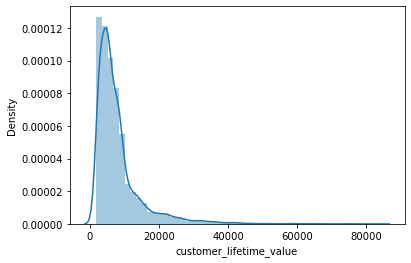

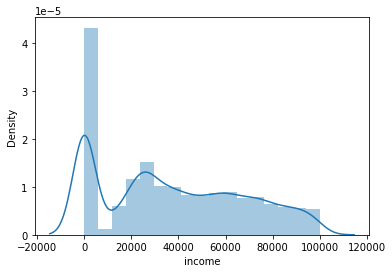

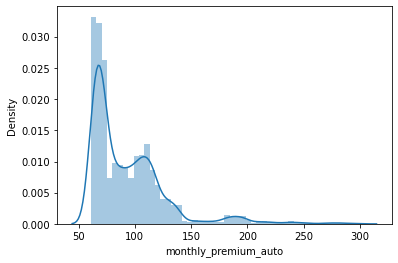

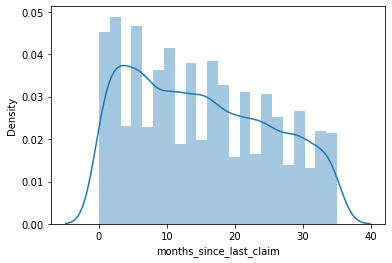

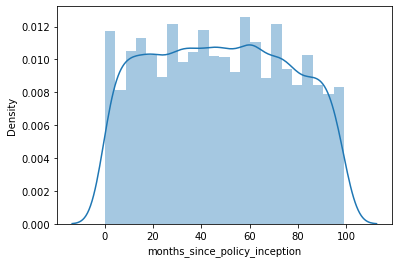

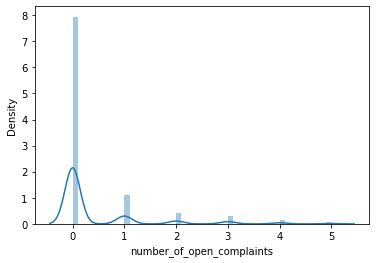

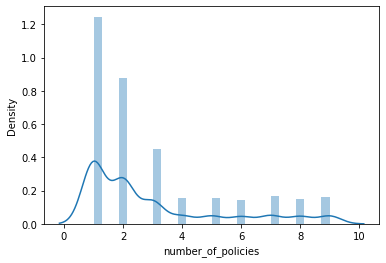

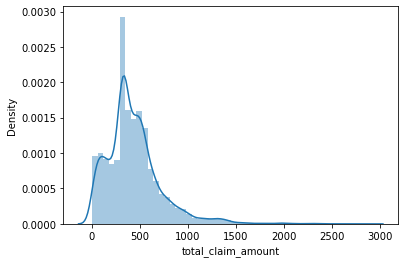

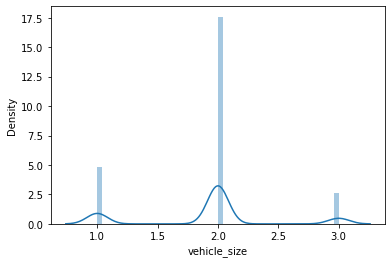

In [323]:
for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column])
    plt.show()

In [324]:
# could not find any normal distribution in the numerical columns

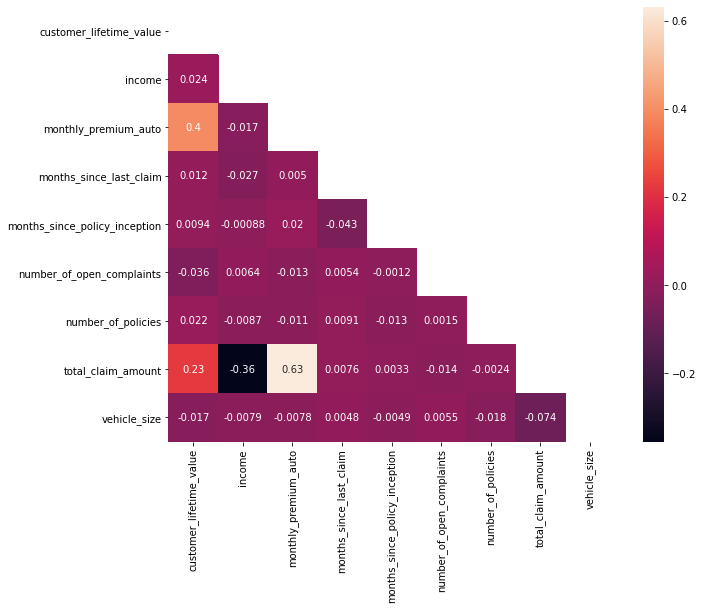

In [325]:
mask = np.zeros_like(df.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()

# there are no correlation which is higher than 0.9, thus it is not necessary to drop any column

## 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

In [326]:
df['customer_lifetime_value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [327]:
df['monthly_premium_auto'].describe()

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: monthly_premium_auto, dtype: float64

In [328]:
# I decided to deal the outliers of 'customer_life_value' and 'monthly_premium_auto'

In [329]:
df1 = df.copy()

In [330]:
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [331]:
iqr1 = np.percentile(df1['customer_lifetime_value'],75) - np.percentile(df1['customer_lifetime_value'],25)
iqr2 = np.percentile(df1['monthly_premium_auto'],75) - np.percentile(df1['monthly_premium_auto'],25)

print(iqr1,iqr2)

4967.915247000001 41.0


In [332]:
upper_limit1 = np.percentile(df1['customer_lifetime_value'],75) + 1.5*iqr1
lower_limit1 = np.percentile(df1['customer_lifetime_value'],25) - 1.5*iqr1
upper_limit2 = np.percentile(df1['monthly_premium_auto'],75) + 1.5*iqr2
lower_limit2 = np.percentile(df1['monthly_premium_auto'],25) - 1.5*iqr2

In [333]:
df1 = df1[(df1['customer_lifetime_value']>lower_limit1) & (df1['customer_lifetime_value']<upper_limit1)]
df1 = df1[(df1['monthly_premium_auto']>lower_limit2) & (df1['monthly_premium_auto']<upper_limit2)]

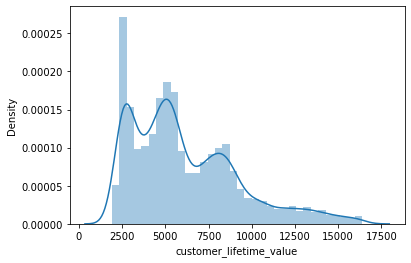

In [334]:
sns.distplot(df1['customer_lifetime_value'])
plt.show()

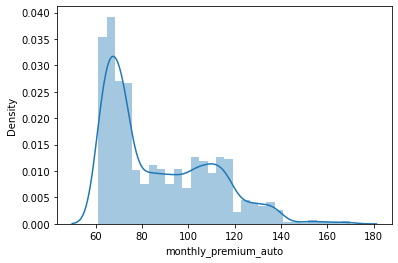

In [335]:
sns.distplot(df1['monthly_premium_auto'])
plt.show()

In [336]:
# Normalization

In [337]:
def boxcox_transform(df):
    numeric_cols = df1.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df1[column] = np.where(df1[column]<=0, np.NAN, df[column]) 
        df1[column] = df1[column].fillna(df1[column].mean())
        transformed_data, ci = stats.boxcox(df1[column])
        df1[column] = transformed_data
        _ci[column] = [ci] 
    return df1, _ci

In [338]:
df1, _ci = boxcox_transform(df1)
df1

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,7.006242,No,Basic,Bachelor,2011-02-24,Employed,F,1201.691030,Suburban,Married,0.781334,10.782054,3.008013,0.672603,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,58.200363,Two-Door Car,1.027349
QZ44356,Arizona,7.716195,No,Extended,Bachelor,2011-01-31,Unemployed,F,1126.068191,Suburban,Single,0.782494,5.773149,18.612689,0.672603,1.461512,Personal Auto,Personal L3,Offer3,Agent,112.949234,Four-Door Car,1.027349
AI49188,Nevada,8.174785,No,Premium,Bachelor,2011-02-19,Employed,F,1102.302199,Suburban,Married,0.782884,7.296692,17.238979,0.672603,0.613081,Personal Auto,Personal L3,Offer1,Agent,73.896606,Two-Door Car,1.027349
WW63253,California,7.784945,No,Basic,Bachelor,2011-01-20,Unemployed,M,1126.068191,Suburban,Married,0.782836,7.296692,25.893323,0.672603,1.397029,Corporate Auto,Corporate L2,Offer1,Call Center,70.918465,SUV,1.027349
HB64268,Washington,7.020230,No,Basic,Bachelor,2011-02-03,Employed,M,1033.675306,Rural,Single,0.781581,5.439438,19.285218,0.672603,0.000000,Personal Auto,Personal L1,Offer1,Agent,30.637715,Four-Door Car,1.027349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YM19146,California,7.311160,No,Premium,College,2011-01-06,Employed,F,1088.534114,Suburban,Single,0.782785,6.712640,23.770962,0.672603,0.000000,Personal Auto,Personal L2,Offer1,Branch,71.854900,Four-Door Car,2.092737
PK87824,California,7.094553,Yes,Extended,College,2011-02-12,Employed,F,674.524168,Suburban,Divorced,0.781898,6.095876,13.603156,0.672603,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,57.673166,Four-Door Car,1.027349
TD14365,California,7.834251,No,Extended,Bachelor,2011-02-06,Unemployed,M,1126.068191,Suburban,Single,0.782166,4.357368,16.889119,1.202650,0.613081,Corporate Auto,Corporate L2,Offer1,Branch,90.708370,Four-Door Car,1.027349


In [339]:
_ci

{'customer_lifetime_value': [-0.031741025070620106],
 'income': [0.6020754220691583],
 'monthly_premium_auto': [-1.274049999180181],
 'months_since_last_claim': [0.5654147042492192],
 'months_since_policy_inception': [0.7102277020341308],
 'number_of_open_complaints': [0.1623056455486085],
 'number_of_policies': [-0.3617237703537733],
 'total_claim_amount': [0.6022255589126246],
 'vehicle_size': [1.0696020598254756]}

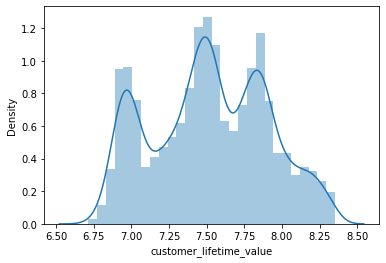

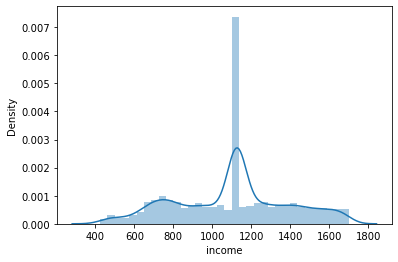

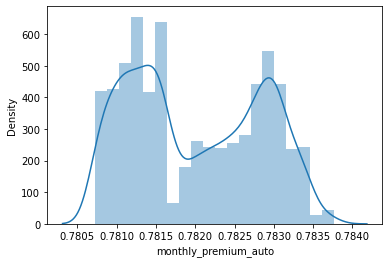

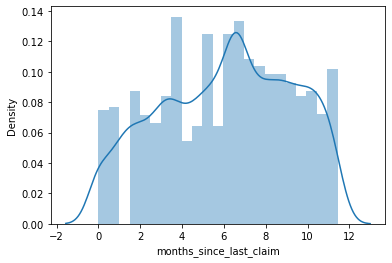

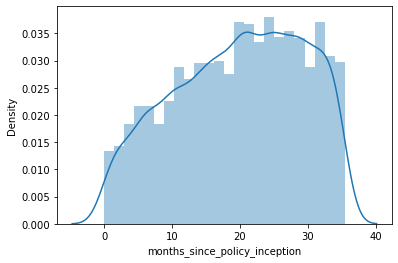

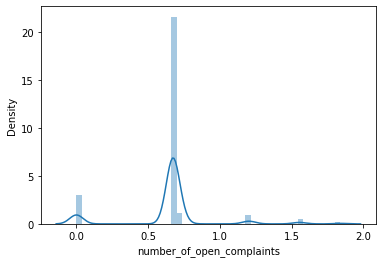

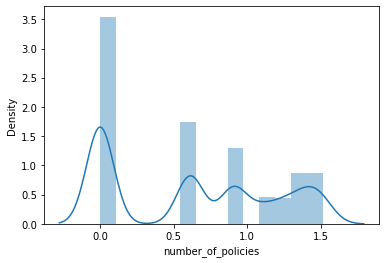

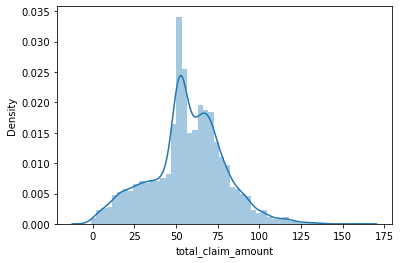

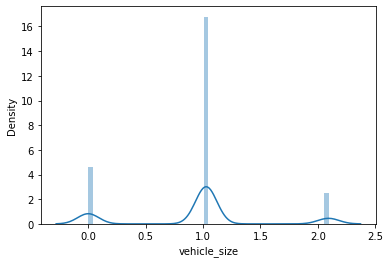

In [359]:
for column in df1.select_dtypes(np.number).columns:
    sns.distplot(df1[column])
    plt.show()

In [340]:
df2 = pd.get_dummies(df1, drop_first=True)
df2

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,7.006242,2011-02-24,1201.691030,0.781334,10.782054,3.008013,0.672603,0.000000,58.200363,1.027349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
QZ44356,7.716195,2011-01-31,1126.068191,0.782494,5.773149,18.612689,0.672603,1.461512,112.949234,1.027349,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
AI49188,8.174785,2011-02-19,1102.302199,0.782884,7.296692,17.238979,0.672603,0.613081,73.896606,1.027349,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
WW63253,7.784945,2011-01-20,1126.068191,0.782836,7.296692,25.893323,0.672603,1.397029,70.918465,1.027349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
HB64268,7.020230,2011-02-03,1033.675306,0.781581,5.439438,19.285218,0.672603,0.000000,30.637715,1.027349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YM19146,7.311160,2011-01-06,1088.534114,0.782785,6.712640,23.770962,0.672603,0.000000,71.854900,2.092737,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
PK87824,7.094553,2011-02-12,674.524168,0.781898,6.095876,13.603156,0.672603,0.000000,57.673166,1.027349,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
TD14365,7.834251,2011-02-06,1126.068191,0.782166,4.357368,16.889119,1.202650,0.613081,90.708370,1.027349,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [341]:
# Encoding Categorical Data
# Splitting into train set and test set

X = df2.drop(['total_claim_amount','effective_to_date'], axis=1)
y = df2['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

## 05 - Modeling

Apply model.

In [342]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [343]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     736.8
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:52:38   Log-Likelihood:                -29778.
No. Observations:                8033   AIC:                         5.965e+04
Df Residuals:                    7987   BIC:                         5.997e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [344]:
X.columns

Index(['const', 'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'vehicle_size',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_Yes', 'coverage_Extended', 'coverage_Premium',
       'education_College', 'education_Doctor',
       'education_High School or Below', 'education_Master',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_M',
       'location_code_Suburban', 'location_code_Urban',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Personal Auto', 'policy_type_Special Auto',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
       'policy_Special L2', 'policy_Special L3', 'renew_o

In [345]:
# eliminate the variables whose Pvalue is over 0.05

X2 = df2.drop(['total_claim_amount','effective_to_date', 'customer_lifetime_value','months_since_last_claim',
               'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies',
               'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington', 
               'education_College', 'education_Doctor', 'education_High School or Below', 'education_Master',
               'employmentstatus_Employed', 'employmentstatus_Medical Leave','employmentstatus_Retired', 
               'employmentstatus_Unemployed',
               'policy_type_Personal Auto', 'policy_type_Special Auto',
               'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
               'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
               'policy_Special L2', 'policy_Special L3', 'renew_offer_type_Offer2',
               'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
               'sales_channel_Branch', 'sales_channel_Call Center',
               'sales_channel_Web',
              ], axis=1)
y = df2['total_claim_amount']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=10)

In [346]:
model = LinearRegression()
model.fit(X_train2, y_train2)

LinearRegression()

In [347]:
X2 = sm.add_constant(X2)
model = sm.OLS(y,X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2230.
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:52:38   Log-Likelihood:                -29984.
No. Observations:                8033   AIC:                         6.000e+04
Df Residuals:                    8018   BIC:                         6.010e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [348]:
# eliminate the variables whose Pvalue is over 0.05

X3 = X2.drop('income', axis=1)
y = df2['total_claim_amount']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.3, random_state=10)

In [349]:
model = LinearRegression()
model.fit(X_train3, y_train3)

LinearRegression()

In [350]:
X3 = sm.add_constant(X3)
model = sm.OLS(y,X3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2401.
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:52:38   Log-Likelihood:                -29984.
No. Observations:                8033   AIC:                         6.000e+04
Df Residuals:                    8019   BIC:                         6.009e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

In [351]:
predictions = model.predict(X_test3)

In [352]:
# R2
r2_score(y_test3, predictions)

0.80351982906292

In [353]:
# MSE
mse = mean_squared_error(y_test3, predictions)
mse

99.33317575862583

In [354]:
# RMSE
import math

math.sqrt(mse)

9.966603020017695

In [355]:
# MAE
mean_absolute_error(y_test3, predictions)

7.759479882182805

## 07 - Reporting

Present results.

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

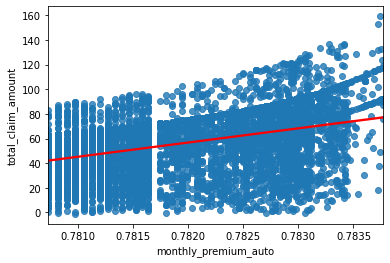

In [356]:
sns.regplot(X3['monthly_premium_auto'], y, line_kws={"color": "red"})

<AxesSubplot:xlabel='total_claim_amount'>

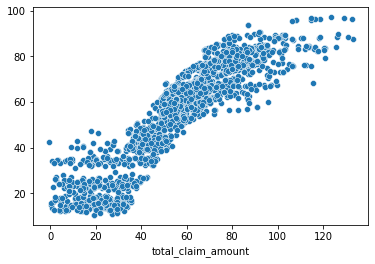

In [357]:
sns.scatterplot(y,predictions)

<AxesSubplot:xlabel='total_claim_amount'>

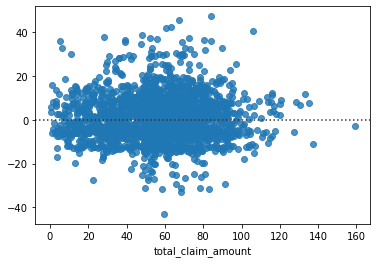

In [358]:
residuals = y - predictions
sns.residplot(y,residuals)

# --Conclusion--

R2 of the model reached 0.8035.

Setting the target variable as 'Total Claim Amount', the independent variables for the best model were as following.

- monthly_premium_auto (normalized by Boxcox)
- vehicle (done labeling encoding, changed datatype into ordinal number)
- response (made dummies)
- coverage (made dummies)
- gender (made dummies)
- location_code (made dummies)
- marital_status (made dummies)
- vehicle_class (made dummies)